In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [97]:
data = pd.read_csv("results/A/A_f_4_d_5.csv")
data

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism
0,0,10,1000,0.000000,0.000000,1.000000,1.000000,NaN
1,1,10,995,0.019989,0.689594,1.000000,1.000000,1.233870
2,2,10,995,0.027357,1.088662,0.999928,0.999890,1.272488
3,3,10,1000,0.031452,1.204307,0.999930,0.999651,1.316735
4,4,10,1011,0.033281,1.204307,0.999608,0.998813,1.343509
...,...,...,...,...,...,...,...,...
9995,9995,3,1498,0.026435,248.186645,0.416301,0.428472,1.760474
9996,9996,3,1514,0.025398,248.186645,0.417160,0.424194,1.741675
9997,9997,3,1529,0.025297,248.186645,0.418093,0.423580,1.723600
9998,9998,3,1547,0.023780,248.186645,0.417347,0.421120,1.710334


In [98]:
dataframes = []

for type in ["S"]: # ["A", "D", "S"]:
    path = f"results/{type}/"
    for file in os.listdir(path):
        data = pd.read_csv(path + file)
        
        # data = data.tail(1)
        data = pd.DataFrame([data.mean()])

        parts = file.split(".")[0].split("_")
        data["f"] = int(parts[2])
        data["d"] = int(parts[4])
        # data["Egalitarianism"] = data["Egalitarianism"].fillna(0)
        data["Cooperation"] = (data["PeerTransfer"] + data["SubTransfer"]) / 2
        dataframes.append(data)

dataframe = pd.concat(dataframes)
dataframe

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism,f,d,Cooperation
0,4999.5,2.8359,1708.5500,0.846904,247.718922,0.722413,0.628258,inf,0,0,0.675336
0,4999.5,3.1833,1697.3585,0.178227,278.223958,0.679047,0.683993,inf,0,1,0.681520
0,4999.5,3.0738,1704.4404,0.084167,295.547343,0.630558,0.652551,inf,0,2,0.641554
0,4999.5,3.3644,1714.6160,0.040362,265.061045,0.694525,0.592847,inf,0,3,0.643686
0,4999.5,2.9169,1709.9148,0.027293,301.399276,0.560726,0.530784,inf,0,4,0.545755
...,...,...,...,...,...,...,...,...,...,...,...
0,4999.5,2.7035,2519.3004,0.050332,280.326235,0.623419,0.570429,1.601895,7,5,0.596924
0,4999.5,5.2611,2553.5630,0.036821,293.693584,0.584001,0.605854,1.593579,7,6,0.594928
0,4999.5,6.0517,2551.8523,0.024698,277.853928,0.666631,0.583731,1.598820,7,7,0.625181
0,4999.5,4.3675,2536.2052,0.013215,277.187843,0.591499,0.631002,1.597081,7,8,0.611250


In [99]:
sns.set_theme()
plt.figure()

dataframe = dataframe.pivot(index="f", columns="d", values="Egalitarianism")
# f0 wasn't present in previous papers because its unrepresentative
dataframe.drop(0, inplace=True)
dataframe = dataframe.apply(lambda x: 1/x) # if not x.isnan() else 0.0, inplace=True)
dataframe.iloc[0].iloc[4] = dataframe.iloc[0].iloc[3]
dataframe

d,0,1,2,3,4,5,6,7,8,9
f,,,,,,,,,,
1,0.501249,0.444575,0.502784,0.566844,0.566844,0.515625,0.561651,0.574084,0.561139,0.566070
2,0.480022,0.491885,0.536558,0.569319,0.558183,0.590170,0.586918,0.581551,0.581204,0.582692
3,0.486296,0.522294,0.563597,0.588321,0.595396,0.601289,0.609218,0.599122,0.603074,0.600048
4,0.491202,0.524409,0.578342,0.581808,0.600961,0.607516,0.605811,0.604785,0.604063,0.601306
5,0.482025,0.517863,0.550986,0.581042,0.581906,0.588570,0.581376,0.588855,0.587409,0.585859
6,0.488227,0.504126,0.541231,0.581181,0.591709,0.605524,0.604583,0.607211,0.607822,0.606299
7,0.498872,0.502720,0.535942,0.601472,0.615065,0.624261,0.627518,0.625461,0.626142,0.626932


<Figure size 640x480 with 0 Axes>

<Axes: xlabel='d', ylabel='f'>

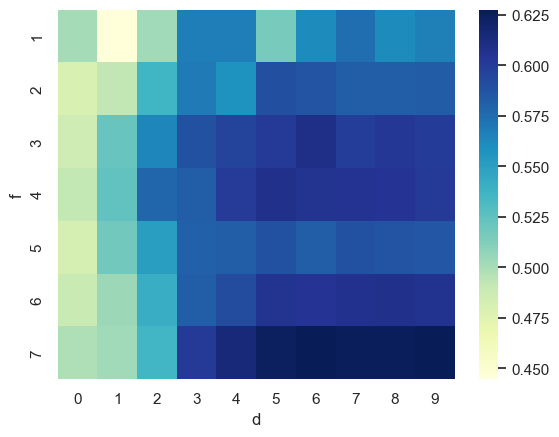

In [100]:
sns.heatmap(data=dataframe, cmap="YlGnBu")